In [18]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### A6.3

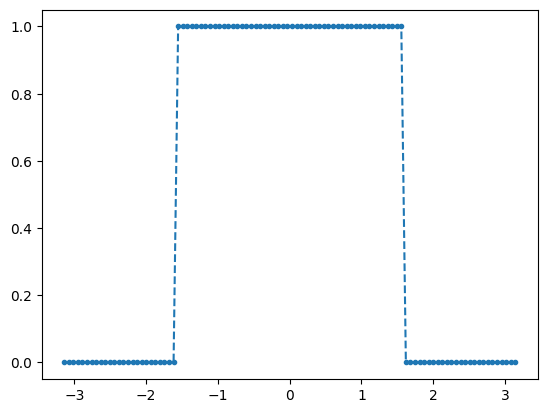

In [19]:
# Set up Problem
start = -np.pi
stop = np.pi
num = 100
T = np.linspace(start, stop, num)

y = lambda x: np.array( np.abs(x)<= np.pi/2 ).astype(int)

plt.plot(T, y(T),'.--')

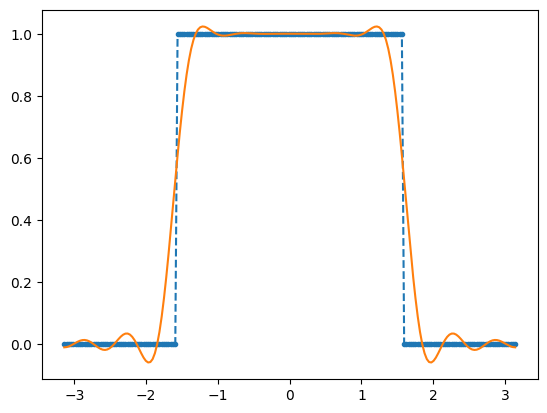

In [20]:
# L1 Norm Approximation
K = 10
N = K * 10

T = np.linspace(start, stop, 2*N)

a1 = cp.Variable(K+1)
# b = cp.Variable(K)

obj = cp.Minimize(
    np.pi/N*cp.norm1(
        cp.vstack(
            [ cp.sum(
                    cp.vstack(
                        [a1[k]*np.cos(k*t) for k in range(K+1)]
                    )
                ) - y(t) for t in T
            ]
        )
    )
)


constraints = []

prob = cp.Problem(obj, constraints)

prob.solve()

plt.plot(T, y(T),'.--')
plt.plot(T, [ np.sum(
                    # cp.vstack(
                        [a1.value[k]*np.cos(k*t) for k in range(K+1)]
                    # )
                ) for t in T
            ]) 

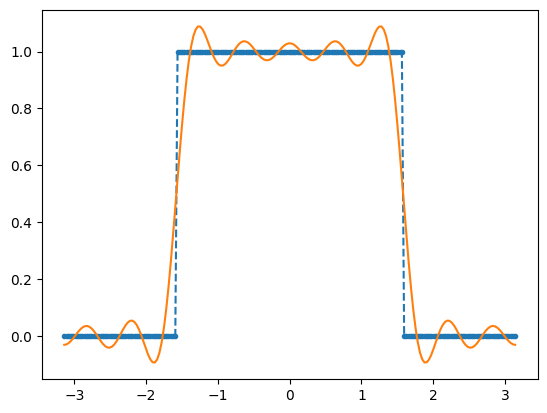

In [21]:
# L2 Norm Approximation
K = 10
N = K * 10

T = np.linspace(start, stop, 2*N)

a2 = cp.Variable(K+1)

obj = cp.Minimize(
    np.pi/N*cp.norm2(
        cp.vstack(
            [ cp.sum(
                    cp.vstack(
                        [a2[k]*np.cos(k*t) for k in range(K+1)]
                    )
                ) - y(t) for t in T
            ]
        )
    )
)


constraints = []

prob = cp.Problem(obj, constraints)

prob.solve()

plt.plot(T, y(T),'.--')
plt.plot(T, [ np.sum(
                    # cp.vstack(
                        [a2.value[k]*np.cos(k*t) for k in range(K+1)]
                    # )
                ) for t in T
            ]) 

Text(0.5, 1.0, 'Approximation Solution')

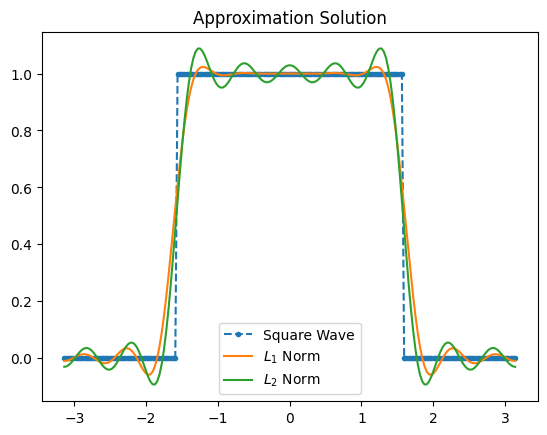

In [22]:
plt.plot(T, y(T),'.--', label='Square Wave')
plt.plot(T, [ np.sum(
                    # cp.vstack(
                        [a1.value[k]*np.cos(k*t) for k in range(K+1)]
                    # )
                ) for t in T
            ], label='$L_1$ Norm') 
plt.plot(T, [ np.sum(
                    # cp.vstack(
                        [a2.value[k]*np.cos(k*t) for k in range(K+1)]
                    # )
                ) for t in T
            ], label='$L_2$ Norm') 
plt.legend()
plt.title('Approximation Solution')



Text(0.5, 1.0, 'Residual')

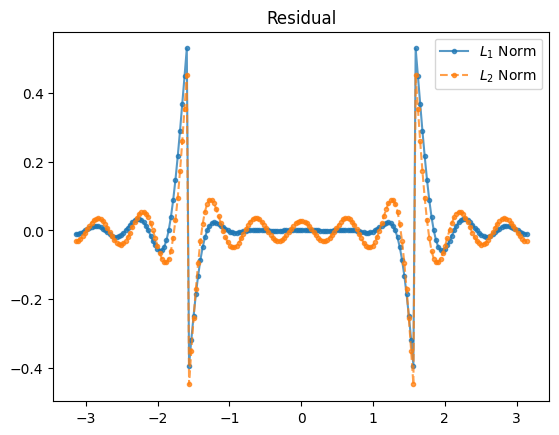

In [23]:
# plt.plot(T, y(T)-y(T),'.--', label='Square Wave')
plt.plot(T, [ np.sum(
                    # cp.vstack(
                        [a1.value[k]*np.cos(k*t) for k in range(K+1)]
                    # )
                ) - y(t) for t in T
            ],'.-', label='$L_1$ Norm', alpha=3/4) 
plt.plot(T, [ np.sum(
                    # cp.vstack(
                        [a2.value[k]*np.cos(k*t) for k in range(K+1)]
                    # )
                ) - y(t) for t in T
            ],'.--', label='$L_2$ Norm', alpha=3/4) 
plt.legend()
plt.title('Residual')

- Faster Rise Time for L2 compared to L1
- L1 settle faster than L2

### A6.12

We will approximately solve this problem iteratively by the following method:
1. Let the initial objective value take on $+\inf$
2. Make an initial guess that our permutation to be the identity matrix
3. Solve the minimization over $x$ of $||Ax-P^Ty||_2$
4. If the difference between the last and the new objective value is less than 1e-3, we think the solution has converged and exit; otherwise, continue to next steps
5. Based on the optimal $x^*$, we calculate $Ax$
6. Find what $P^T$ would reorder $y$ in such a way that Entry i in both $Ax$ and $P^Ty$ are ranked the same if we were to sort the two vectors
7. Go to Step 2, solve the Minimization with the new P obtained in Step 6

In [8]:
np.random.seed(0)
m=100
k=40 # max # permuted measurements
n=20
A=10*np.random.randn(m,n)
x_true=np.random.randn(n,1) # true x value
y_true = A.dot(x_true) + np.random.randn(m,1)
# build permuted indices
perm_idxs=np.random.permutation(m)
# perm_idxs
perm_idxs=np.sort(perm_idxs[:k])
# perm_idxs
temp_perm=np.random.permutation(k)
# temp_perm
new_pos=np.zeros(k)
for i in range(k):
    new_pos[i] = perm_idxs[temp_perm[i]]
new_pos = new_pos.astype(int)
# true permutation matrix
P=np.identity(m)
P[perm_idxs,:]=P[new_pos,:]
true_perm=[]
for i in range(k):
    # print(perm_idxs[i], new_pos[i])
    if perm_idxs[i] != new_pos[i]:
        true_perm = np.append(true_perm, perm_idxs[i])
y=P.dot(y_true)
# new_pos = None

In [9]:
np.random.seed(1)
x0 = np.random.randn(n)
Ax = A@x0
# Ax.sort(axis=0)

Ax_rank = (Ax).argsort(axis=0).argsort(axis=0)#==y.argsort(axis=0).argsort(axis=0)
y_rank = y.argsort(axis=0).argsort(axis=0)

In [10]:
y.shape

(100, 1)

In [11]:
np.random.choice(100, size=100, replace=False)

array([78, 60, 31,  5, 70, 45, 14, 44, 73, 88, 50, 53, 85, 92, 29, 16, 35,
       89, 83, 19, 40, 91, 63, 97, 59, 42, 33, 98, 69, 96, 17, 28, 65, 72,
       81, 66, 18,  4, 47, 39, 36, 30, 20, 51, 48, 75, 77, 86, 11, 54, 79,
       12,  2, 58, 21, 94,  6, 61, 56,  0,  3, 13, 49,  1, 55, 71, 74, 46,
       62, 84, 90, 93, 10, 34, 32,  8, 38, 57, 37, 27, 23, 67,  9, 22, 87,
       95,  7, 25, 99, 64, 15, 82, 41, 80, 52, 26, 76, 43, 24, 68])

In [12]:
import scipy.stats

In [13]:
cost_min = np.inf
x_optimal = None
P_optimal = None

for i in range(1):

    P_hat = np.eye(m)
    # P_hat = P_hat[np.random.choice(100, size=100, replace=False)]
    
    x_eye = None
    
    improvement = np.inf
    cost_last = np.inf
    
    eps = 1e-3
    
    while improvement>=eps:
    
        x = cp.Variable((n,1))
        
        obj = cp.Minimize(cp.norm2(A@x-P_hat.T@y))
        
        constraints = []
        
        prob = cp.Problem(obj, constraints)
    
        cost = prob.solve()
        improvement = cost_last - cost
        cost_last = cost
        # print(cost)
    
        x0 = x.value
    
        # Save the solution to x when we assume P = I
        if (P_hat==np.eye(m)).all():
            x_eye = x0
        
        Ax = A@x0
        Ax_rank = (Ax).argsort(axis=0).argsort(axis=0)
        y_rank = y.argsort(axis=0).argsort(axis=0)
        # Constrcut a permutation matrix
        P_reorder = []
        for r in Ax_rank:
            i_y, _ = np.where(y_rank==r)
        
            P_reorder.append(i_y)
            # break
        
        P_reorder = np.array(P_reorder)
        # P_reorder.shape
        
        P_hat = []
        for i_y in P_reorder:
            u_i = np.zeros((m))
            u_i[i_y] = 1
        
            P_hat.append(u_i)
        
        P_hat = np.array(P_hat).T
        # break
    print(cost)
    if cost < cost_min:
        cost_min = cost
        x_optimal = x0
        P_optimal = P_hat

35.272189635474625


In [14]:
x_eye

array([[-1.11507836],
       [-1.40642658],
       [ 0.81540648],
       [-0.74677862],
       [-0.37023583],
       [-0.24322015],
       [-0.74092514],
       [-0.44079927],
       [ 0.31571575],
       [ 0.09169404],
       [ 0.35551171],
       [-0.08121674],
       [-0.0261098 ],
       [ 0.51482702],
       [ 0.42091395],
       [-0.00784192],
       [ 0.41527582],
       [ 0.70532982],
       [-2.07503966],
       [ 1.04241053]])

In [15]:
cost_min,x_optimal

(35.272189635474625,
 array([[-1.6293334 ],
        [-2.35203072],
        [ 1.43385102],
        [-0.75241133],
        [-0.3539387 ],
        [-0.24034968],
        [-1.02804586],
        [-0.47251534],
        [ 0.93358932],
        [ 0.40094005],
        [ 0.50242688],
        [ 0.04686509],
        [ 0.28244187],
        [ 0.40752456],
        [ 0.43346313],
        [-0.46582331],
        [ 0.88061023],
        [ 1.00649178],
        [-2.76513174],
        [ 1.17787041]]))

In [16]:
np.linalg.norm(x_optimal-x_true)

2.280120529425616

In [17]:
x_true

array([[-1.53292105],
       [-1.71197016],
       [ 0.04613506],
       [-0.95837448],
       [-0.08081161],
       [-0.70385904],
       [-0.7707843 ],
       [-0.48084534],
       [ 0.70358555],
       [ 0.92914515],
       [ 0.37117255],
       [-0.98982255],
       [ 0.64363128],
       [ 0.68889667],
       [ 0.2746472 ],
       [-0.60362044],
       [ 0.70885958],
       [ 0.42281857],
       [-3.11685659],
       [ 0.64445203]])

### A6.19

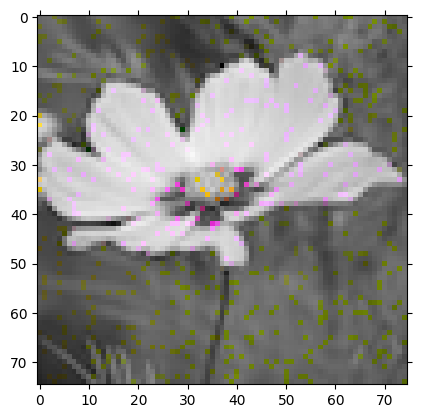

In [2]:
# Setting up the Problem
img = mpimg.imread("../figures/flower.png")
img = img[:,:,0:3]
m,n,_ = img.shape

np.random.seed(5)
known_ind = np.where(np.random.rand(m,n) >= 0.90)
# grayscale image
M = 0.299*img[:,:,0]+0.587*img[:,:,1]+0.114*img[:,:,2]
# known color values
R_known = img[:,:,0]
G_known = img[:,:,1]
B_known = img[:,:,2]
R_known = R_known[known_ind]
G_known = G_known[known_ind]
B_known = B_known[known_ind]

def save_img(filename, R,G,B):
  img = np.stack((np.array(R),np.array(G),np.array(B)), axis=2)
  # turn off ticks and labels of the figure
  plt.tick_params(
    axis='both', which='both', labelleft='off', labelbottom='off',
    bottom='off', top='off', right='off', left='off'
  )
  fig = plt.imshow(img)
  plt.savefig(filename,bbox_inches='tight',pad_inches=0.)

R_given = np.copy(M);
R_given[known_ind] = R_known;
G_given = np.copy(M);
G_given[known_ind] = G_known;
B_given = np.copy(M);
B_given[known_ind] = B_known;
save_img("flower_given.png", R_given, G_given, B_given)

In [3]:
%%time
R_act = cp.Variable((75, 75))
G_act = cp.Variable((75, 75))
B_act = cp.Variable((75, 75))

obj = cp.Minimize(
    cp.tv(*[R_act, G_act, B_act])
)
# +5*cp.norm1(M-0.299*R_act-0.587*G_act-0.114*B_act) # Add Constraint on Monochrome Reconstruction as penalty

constraints = []
# Constraints on known pixel
constraints += [R_act[known_ind]==R_given[known_ind]]
constraints += [G_act[known_ind]==G_given[known_ind]]
constraints += [B_act[known_ind]==B_given[known_ind]]
# Constraint on the range of value
constraints += [R_act[i, j]>=0 for i in range(75) for j in range(75)]
constraints += [R_act[i, j]<=1 for i in range(75) for j in range(75)]
constraints += [G_act[i, j]>=0 for i in range(75) for j in range(75)]
constraints += [G_act[i, j]<=1 for i in range(75) for j in range(75)]
constraints += [B_act[i, j]>=0 for i in range(75) for j in range(75)]
constraints += [B_act[i, j]<=1 for i in range(75) for j in range(75)]
# Constraint on Monochrome Reconstruction
constraints += [M-0.299*R_act-0.587*G_act-0.114*B_act==0]

prob = cp.Problem(obj, constraints)

prob.solve('SCS')

CPU times: user 18.8 s, sys: 293 ms, total: 19.1 s
Wall time: 19.2 s


620.7815937543677

In [4]:
prob.is_dcp()

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


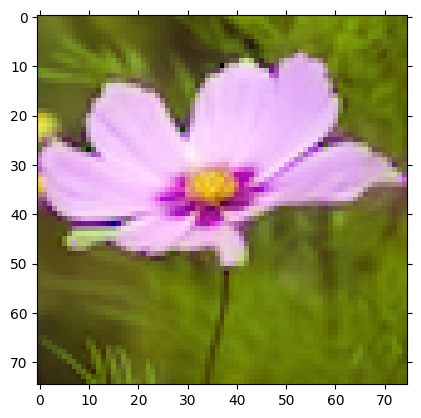

In [5]:
save_img("flower_minimal_tv.png", R_act.value, G_act.value, B_act.value)

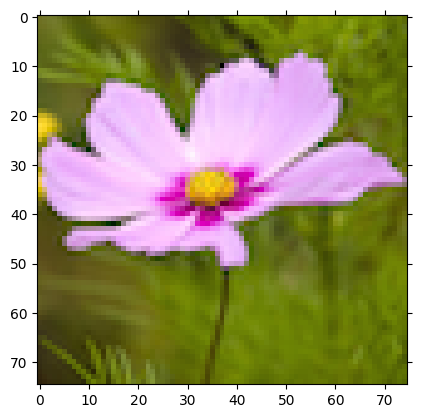

In [44]:
save_img("flower_original.png", img[:,:,0], img[:,:,1], img[:,:,2])

### A8.16

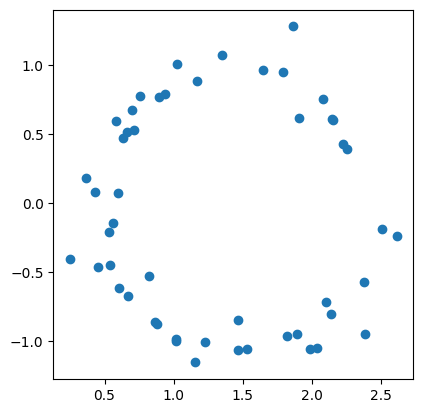

In [18]:
n = 2
m = 50
U = np.array([[1.824183228637652032e+00, 1.349093690455489103e+00, 6.966316403935147727e-01, 7.599387854623529392e-01, 2.388321695850912363e+00, 8.651370608981923116e-01, 1.863922545015865406e+00, 7.099743941474848663e-01, 6.005484882320809570e-01, 4.561429569892232472e-01, 5.328296545713475663e-01, 2.138547819234526415e+00, 1.906676474276197464e+00, 1.015547309536922516e+00, 8.765948388006337133e-01, 1.648147347399247842e+00, 1.027902202451572045e+00, 2.145586297520478691e+00, 1.793440421753045744e+00, 1.020535583041398908e+00, 8.977911075271942654e-01, 1.530480229262339398e+00, 2.478088034137528872e-01, 2.617415807793897820e+00, 2.081978553098443374e+00, 1.891226687205936452e+00, 8.222497927065576251e-01, 5.803514604868882376e-01, 1.158670193449639063e+00, 6.016685032455900695e-01, 5.605410828151705660e-01, 2.508815467550573164e+00, 2.230201413385580977e+00, 1.170848897912992514e+00, 2.256355929901105561e+00, 6.686991510936428629e-01, 2.040269595792217672e+00, 3.634166812924328749e-01, 5.418647611079159265e-01, 6.631470058399455692e-01, 4.286142597532469622e-01, 2.155925078996823618e+00, 2.379380016960549682e+00, 6.343212414048013947e-01, 1.469076407947448981e+00, 1.225322035289937439e+00, 1.467602887401966871e+00, 9.345319187253748883e-01, 1.985592768641736505e+00, 2.106896115090134636e+00],
[-9.644136284187876385e-01, 1.069547315003422927e+00, 6.733229334437943470e-01, 7.788072961810316164e-01, -9.467465278344706636e-01, -8.591303443863639311e-01, 1.279527420871080956e+00, 5.314829019311283487e-01, 6.975676079749143499e-02, -4.641873429414754559e-01, -2.094571396598311763e-01, -8.003479827938377866e-01, 6.135280782546607137e-01, -9.961307468791747999e-01, -8.765215480412106297e-01, 9.655406812422813179e-01, 1.011230180540185541e+00, 6.105416770440197372e-01, 9.486552370654932620e-01, -9.863592657836954825e-01, 7.695327845100754516e-01, -1.060072365810699413e+00, -4.041043465424410952e-01, -2.352952920283236105e-01, 7.560391050507236921e-01, -9.454246095204003053e-01, -5.303145312191936966e-01, 5.979590038743245461e-01, -1.154309511133019717e+00, -6.123184171955468047e-01, -1.464683782538583889e-01, -1.839128688968104386e-01, 4.250070477845909744e-01, 8.861864983476224200e-01, 3.927648421593328276e-01, -6.726102374256350824e-01, -1.047252884197514833e+00, 1.825096825995130845e-01, -4.482373962742914886e-01, 5.115625649313135792e-01, 7.846201103116770548e-02, 6.006325432819290544e-01, -5.710733714464664157e-01, 4.725559971890586075e-01, -8.440290321502940118e-01, -1.003920890712479475e+00, -1.067089412136528637e+00, 7.909281966910661765e-01, -1.059509163675931065e+00, -7.136351632325785843e-01]
])

fig,ax =plt.subplots()
ax.scatter(U[0,:],U[1,:])
ax.set_aspect('equal')

In [20]:
c = cp.Variable(n)
t = cp.Variable()
# r = cp.Variable()

obj = cp.Minimize(
    cp.sum(
        [
            cp.square( U[0,i]**2+U[1,i]**2-2*U[0,i]*c[0]-2*U[1,i]*c[1] - t )
            for i in range(m)
        ]
    )
)

constraints = []

prob = cp.Problem(obj, constraints)

prob.solve()

2.9038284259769465

In [21]:
c.value, t.value

(array([ 1.47590677, -0.04404696]), array(-1.11063708))

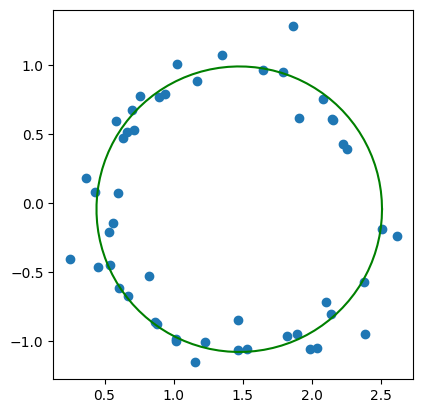

In [24]:
# Recover R through change of variable
r = np.sqrt(t.value + np.linalg.norm(c.value, 2)**2)

θ = np.linspace(0, 2*np.pi, 100)
circle_fit = np.array([r*np.cos(θ), r*np.sin(θ)]).T + c.value

fig,ax =plt.subplots()
ax.scatter(U[0,:],U[1,:])
ax.plot(circle_fit[:,0],circle_fit[:,1],'g-')
ax.set_aspect('equal')

### A17.4

In [22]:
x = np.array([[0.1, 0.2, -0.05, 0.1]]).T

Σ = cp.Variable((4,4))

obj = cp.Maximize(x.T@Σ@x)

constraints = []
constraints += [Σ[0,0]==0.2]
constraints += [Σ[1,1]==0.1]
constraints += [Σ[2,2]==0.3]
constraints += [Σ[3,3]==0.1]
constraints += [Σ[0,1]>=0]
constraints += [Σ[0,2]>=0]
constraints += [Σ[1,0]>=0]
constraints += [Σ[2,0]>=0]
constraints += [Σ[2,3]>=0]
constraints += [Σ[3,2]>=0]
constraints += [Σ[1,2]<=0]
constraints += [Σ[1,3]<=0]
constraints += [Σ[2,1]<=0]
constraints += [Σ[3,1]<=0]
constraints += [Σ>>0]

prob = cp.Problem(obj, constraints)

print("σ_wc value: ", prob.solve())

σ_wc value:  0.015166264279157526


In [18]:
# Worst Case Covariance Matrix
Σ.value

array([[ 2.00000000e-01,  9.30113522e-02, -3.38481035e-07,
         8.36591757e-02],
       [ 9.30113522e-02,  1.00000002e-01, -1.10631305e-01,
        -3.79171057e-07],
       [-3.38481035e-07, -1.10631305e-01,  3.00000000e-01,
         1.89987725e-02],
       [ 8.36591757e-02, -3.79171056e-07,  1.89987725e-02,
         9.99999991e-02]])

In [19]:
# Diagonal Covariance Matrix
x.T@np.diag([0.2,0.1,0.3,0.1])@x

array([[0.00775]])

In [24]:
!export PATH=/Library/TeX/texbin:$PATH